In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('TVC_NDQ, 1M.csv')
df['time'] = df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
df['MoM_pct_change_close']= df['close'].pct_change(fill_method ='ffill')*100
df['monthly_rate_diff'] = df["USINTR, FEDERAL RESERVE: Open"].diff(periods = 1)

df.drop(columns = ['Basis' ,'Upper','Lower','EMA','USINTR, FEDERAL RESERVE: Open','USINTR, FEDERAL RESERVE: High','USINTR, FEDERAL RESERVE: Low','Smoothing Line','MA','Smoothing Line','Plot','Plot','MA','Smoothing Line','Volume','Volume MA', 'Smoothing Line.1', 'Plot.1','MA.1','Smoothing Line.2'], inplace=True)
# filter the time
filt = (df['time'] > '1975')

df[filt]

,time,open,high,low,close,"USINTR, FEDERAL RESERVE: Close",MoM_pct_change_close,monthly_rate_diff
0,1985-01-01,125.0000,125.0000,125.0000,125.0000,8.25,NaN,NaN
1,1985-02-01,124.6300,128.6500,123.5200,123.5200,9.00,-1.184000,0.00
2,1985-03-01,124.8400,125.1100,115.0200,117.3600,8.50,-4.987047,0.75
3,1985-04-01,118.7200,118.8400,115.1400,115.3800,8.25,-1.687117,-0.50
4,1985-05-01,114.8300,123.3600,114.3600,119.6400,7.75,3.692148,-0.25
...,...,...,...,...,...,...,...,...
448,2022-05-02,12864.8303,13556.6667,11492.2914,12642.1001,1.00,-1.654662,0.50
449,2022-06-01,12750.3068,12897.6330,11037.2091,11503.7169,1.75,-9.004700,0.75
450,2022-07-01,11472.6322,12986.6444,11366.0737,12947.9749,2.50,12.554707,0.75
451,2022-08-01,12877.0395,13720.9118,12240.8233,12272.0305,NaN,-5.220464,NaN


Text(0, 0.5, 'USINTR, FEDERAL RESERVE: Close')

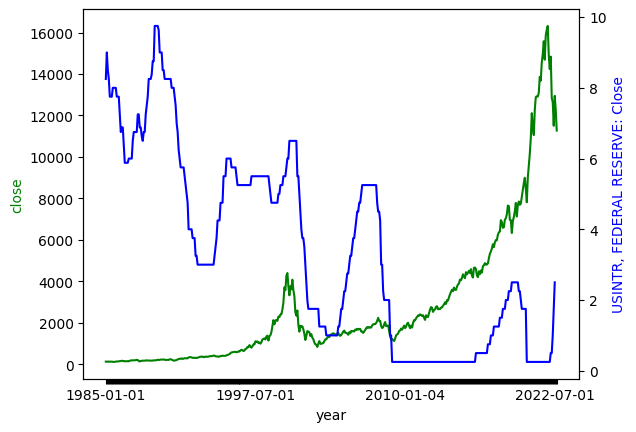

In [2]:
# set timeframe as you whish
filt = (df['time'] > '1975')
df_tf = df[filt] 

x = df_tf['time']
y1 = df_tf['close']
y2 = df_tf['USINTR, FEDERAL RESERVE: Close']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

# timestamps were too close, slicker solution surely exsist, probably with locator params
every_nth = 150
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax1.set_xlabel('year')
ax1.set_ylabel('close', color='g')
ax2.set_ylabel('USINTR, FEDERAL RESERVE: Close', color='b')

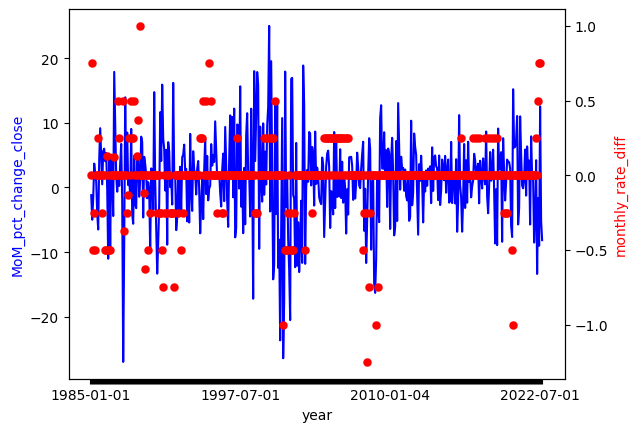

In [3]:
# set timeframe as you whish 
filt = (df['time'] > '1975')
df_tf = df[filt] 

x = df_tf['time']
y1 = df_tf['MoM_pct_change_close']
y2 = df_tf['monthly_rate_diff']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b-')
ax2.scatter(x, y2, marker='o', linewidths= 0.1, c= 'red')

# timestamps were too close, slicker solution surely exsist, probably with locator params
every_nth = 150
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax1.set_xlabel('year')
ax1.set_ylabel('MoM_pct_change_close', color='b')
ax2.set_ylabel('monthly_rate_diff', color='r')

#observe % price changes plotet along monthly rate changes
plt.show()

In [4]:
#observe correlation 
filt = (df['time'] > '1975')
df_tf = df[filt] 

df_tf['close'].corr(df['USINTR, FEDERAL RESERVE: Close'], method='pearson', min_periods=1)

-0.51736063416822

In [9]:
# we are interested in positive correlation in rising rates environments
filt = (df['time'] > '1975')
df_tf = df[filt] 

filt2 = (df['USINTR, FEDERAL RESERVE: Close'] >= 1) & (df['monthly_rate_diff'] > 0)
df_tf[filt2].head(n=5)

,time,open,high,low,close,"USINTR, FEDERAL RESERVE: Close",MoM_pct_change_close,monthly_rate_diff
2,1985-03-01,124.84,125.11,115.02,117.36,8.50,-4.987047,0.75
8,1985-09-02,117.57,117.57,110.62,110.62,8.00,-6.491970,0.25
17,1986-06-02,162.03,162.62,158.10,162.62,6.88,-0.330963,0.13
24,1987-01-01,142.86,167.94,142.86,166.68,6.00,17.870023,0.12
28,1987-05-01,185.83,190.74,181.47,188.77,6.75,2.131689,0.50


In [6]:
filt = (df['time'] > '1975')
df_tf = df[filt]

filt2 = (df['USINTR, FEDERAL RESERVE: Close'] >= 1) & (df['monthly_rate_diff'] > 0)
df_tf[filt2]

df_tf_high_rates_with_hiking = df_tf[filt2]

#calculate correlation in risig rates environemnts
df_tf_high_rates_with_hiking['close'].corr(df['USINTR, FEDERAL RESERVE: Close'], method='pearson', min_periods=1)

-0.5876407519373684